In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
freq_df = pd.read_csv('frequency_domain_features_train.csv')
freq_df.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [4]:
time_df = pd.read_csv('time_domain_features_train.csv')
time_df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757864,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [10]:
freq_df['uuid']

0         89df2855-56eb-4706-a23b-b39363dd605a
1         80c795e4-aa56-4cc0-939c-19634b89cbb2
2         c2d5d102-967c-487d-88f2-8b005a449f3e
3         37eabc44-1349-4040-8896-0d113ad4811f
4         aa777a6a-7aa3-4f6e-aced-70f8691dd2b7
                          ...                 
369284    028ae89f-0120-4808-955f-f6b3ecaa59b3
369285    03f6d164-b28d-49e8-9e27-0288577408ec
369286    fd717478-95c3-48fc-bcdc-3adebae824ab
369287    a0fc861e-3254-4210-bd5d-37870245f7da
369288    1f2eb52d-4f09-4921-a383-ef1bc6221789
Name: uuid, Length: 369289, dtype: object

In [15]:
#merge the HR column to the freq_df to analyze the frequecy related features against our target HR
f_df = pd.merge(left=freq_df, right=time_df[['uuid','HR']], left_on='uuid', right_on='uuid',how='inner')
f_df.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,HR
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,69.499952
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,64.363150
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,67.450066
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,68.809562
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,74.565728


In [16]:
f_df.shape

(369289, 13)

## 1. EDA

In [17]:
# Check whether any null value
f_df.isna().any()

uuid       False
VLF        False
VLF_PCT    False
LF         False
LF_PCT     False
LF_NU      False
HF         False
HF_PCT     False
HF_NU      False
TP         False
LF_HF      False
HF_LF      False
HR         False
dtype: bool

So, there is no missing values.

#### 1.a)Univariate analysis

In [18]:
f_df.dtypes

uuid        object
VLF        float64
VLF_PCT    float64
LF         float64
LF_PCT     float64
LF_NU      float64
HF         float64
HF_PCT     float64
HF_NU      float64
TP         float64
LF_HF      float64
HF_LF      float64
HR         float64
dtype: object

In [19]:
f_df.describe().T

,count,mean,std,min,25%,50%,75%,max
VLF,369289.0,2199.580170,1815.773422,159.480176,1001.189280,1667.903111,2654.121052,12617.977191
VLF_PCT,369289.0,64.289242,16.774844,19.031219,52.909877,66.350237,76.825032,97.738848
LF,369289.0,946.530252,574.171780,90.048557,545.449386,782.716291,1201.432256,3291.548112
LF_PCT,369289.0,34.095182,16.040290,2.165119,22.305936,32.047025,44.647115,77.928847
LF_NU,369289.0,95.566718,4.123365,69.879083,93.645734,96.643140,98.771946,99.987175
HF,369289.0,39.245603,45.398869,0.061783,10.720312,24.841938,45.272368,364.486936
HF_PCT,369289.0,1.615576,1.761073,0.002150,0.346803,1.039513,2.245115,13.095664
HF_NU,369289.0,4.433282,4.123365,0.012825,1.228054,3.356860,6.354266,30.120917
TP,369289.0,3185.356025,1923.227187,377.692795,1828.147788,2796.856587,4052.260157,13390.684098
LF_HF,369289.0,115.977200,360.855129,2.319952,14.737458,28.789747,80.429614,7796.443096


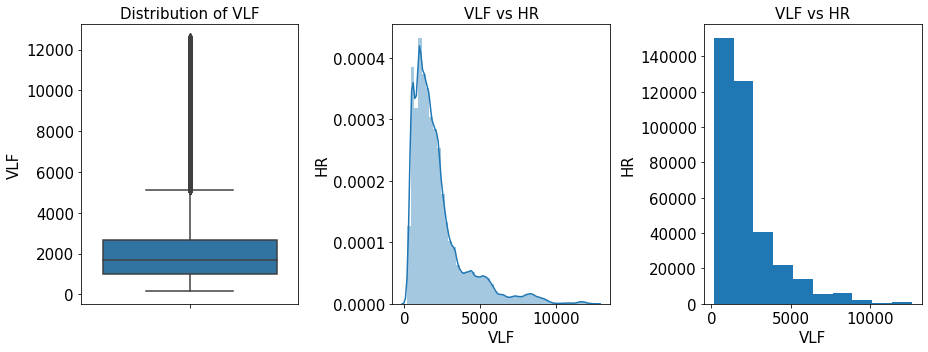

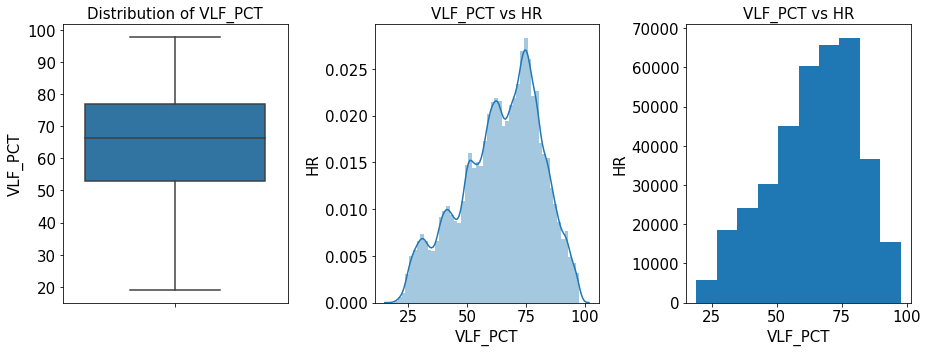

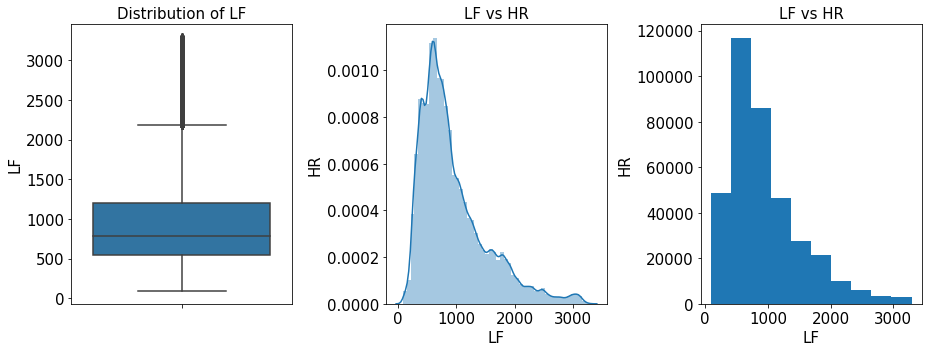

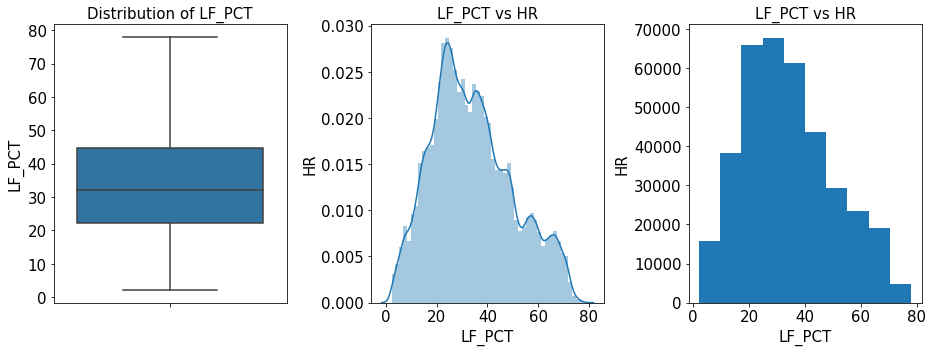

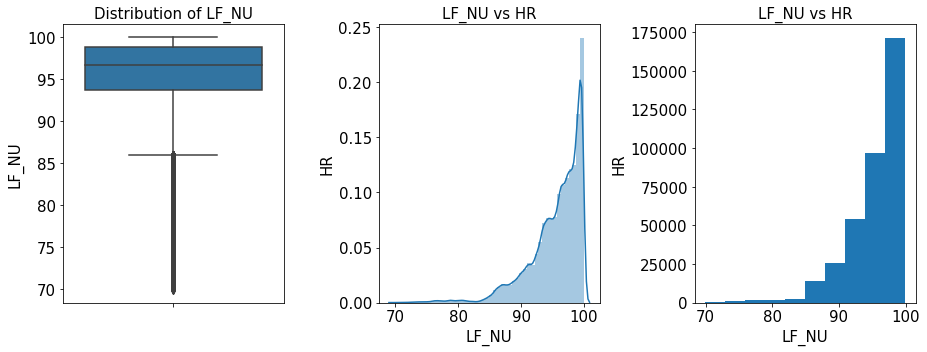

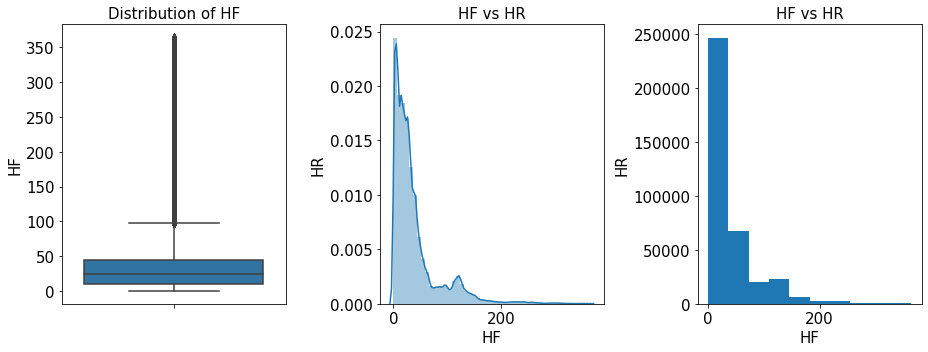

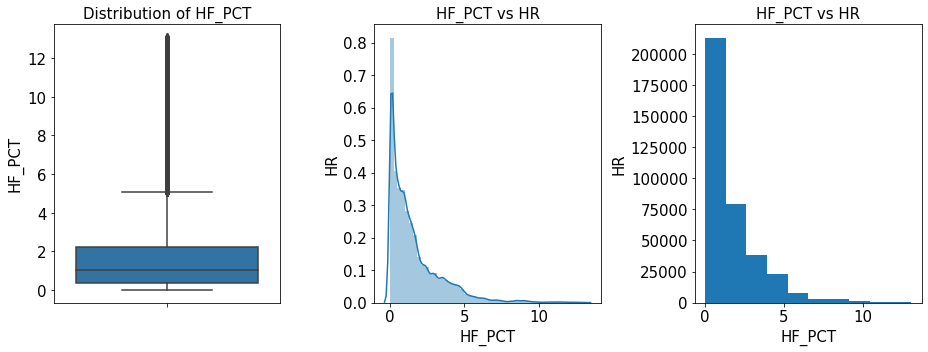

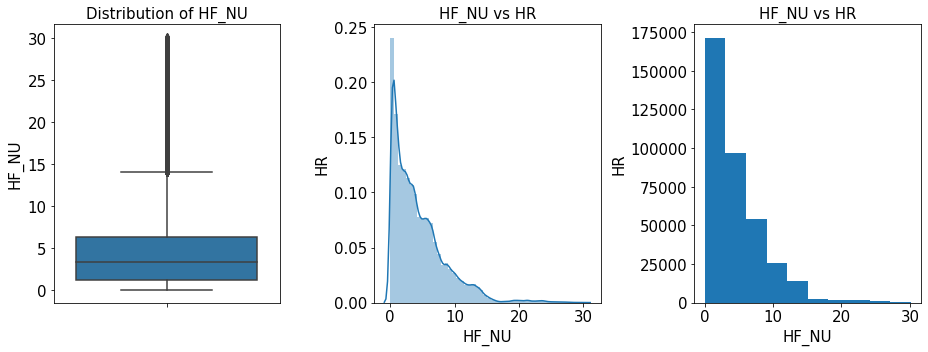

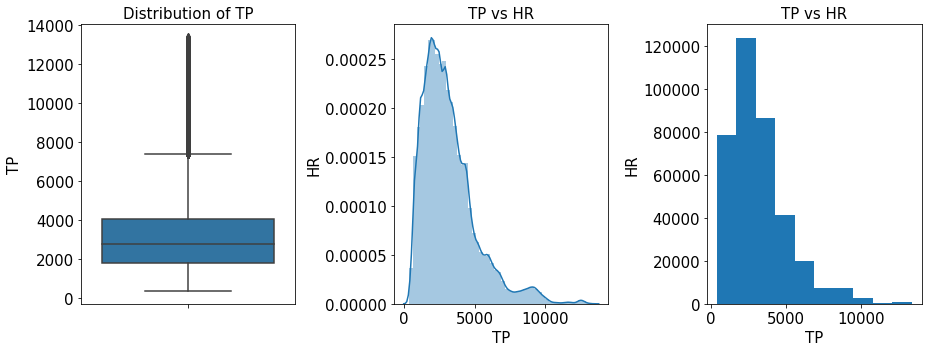

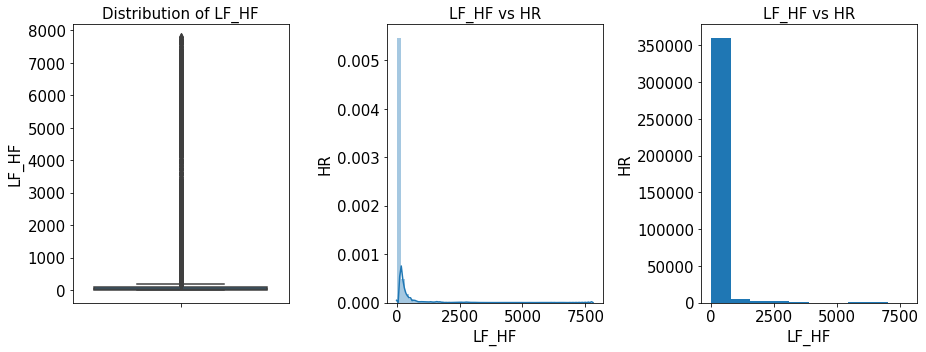

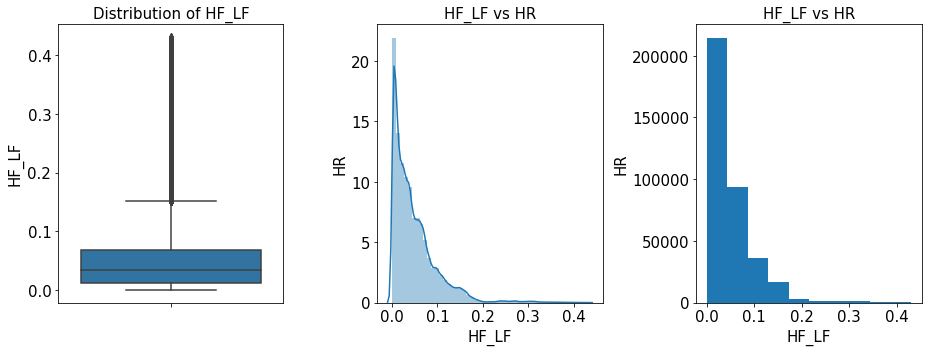

In [31]:
for column in fdf_new: 
    fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

    #boxplot
    sns.boxplot(x=column,data=f_df,orient='v',ax=ax1)
    ax1.set_ylabel(column, fontsize=15)
    ax1.set_title('Distribution of '+column, fontsize=15)
    ax1.tick_params(labelsize=15)

    #distplot
    sns.distplot(f_df[column],ax=ax2)
    ax2.set_xlabel(column, fontsize=15)
    ax2.set_ylabel('HR', fontsize=15)
    ax2.set_title(column+' vs HR', fontsize=15)
    ax2.tick_params(labelsize=15)

    #histogram
    ax3.hist(f_df[column])
    ax3.set_xlabel(column, fontsize=15)
    ax3.set_ylabel('HR', fontsize=15)
    ax3.set_title(column+' vs HR', fontsize=15)
    ax3.tick_params(labelsize=15)

    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout() 

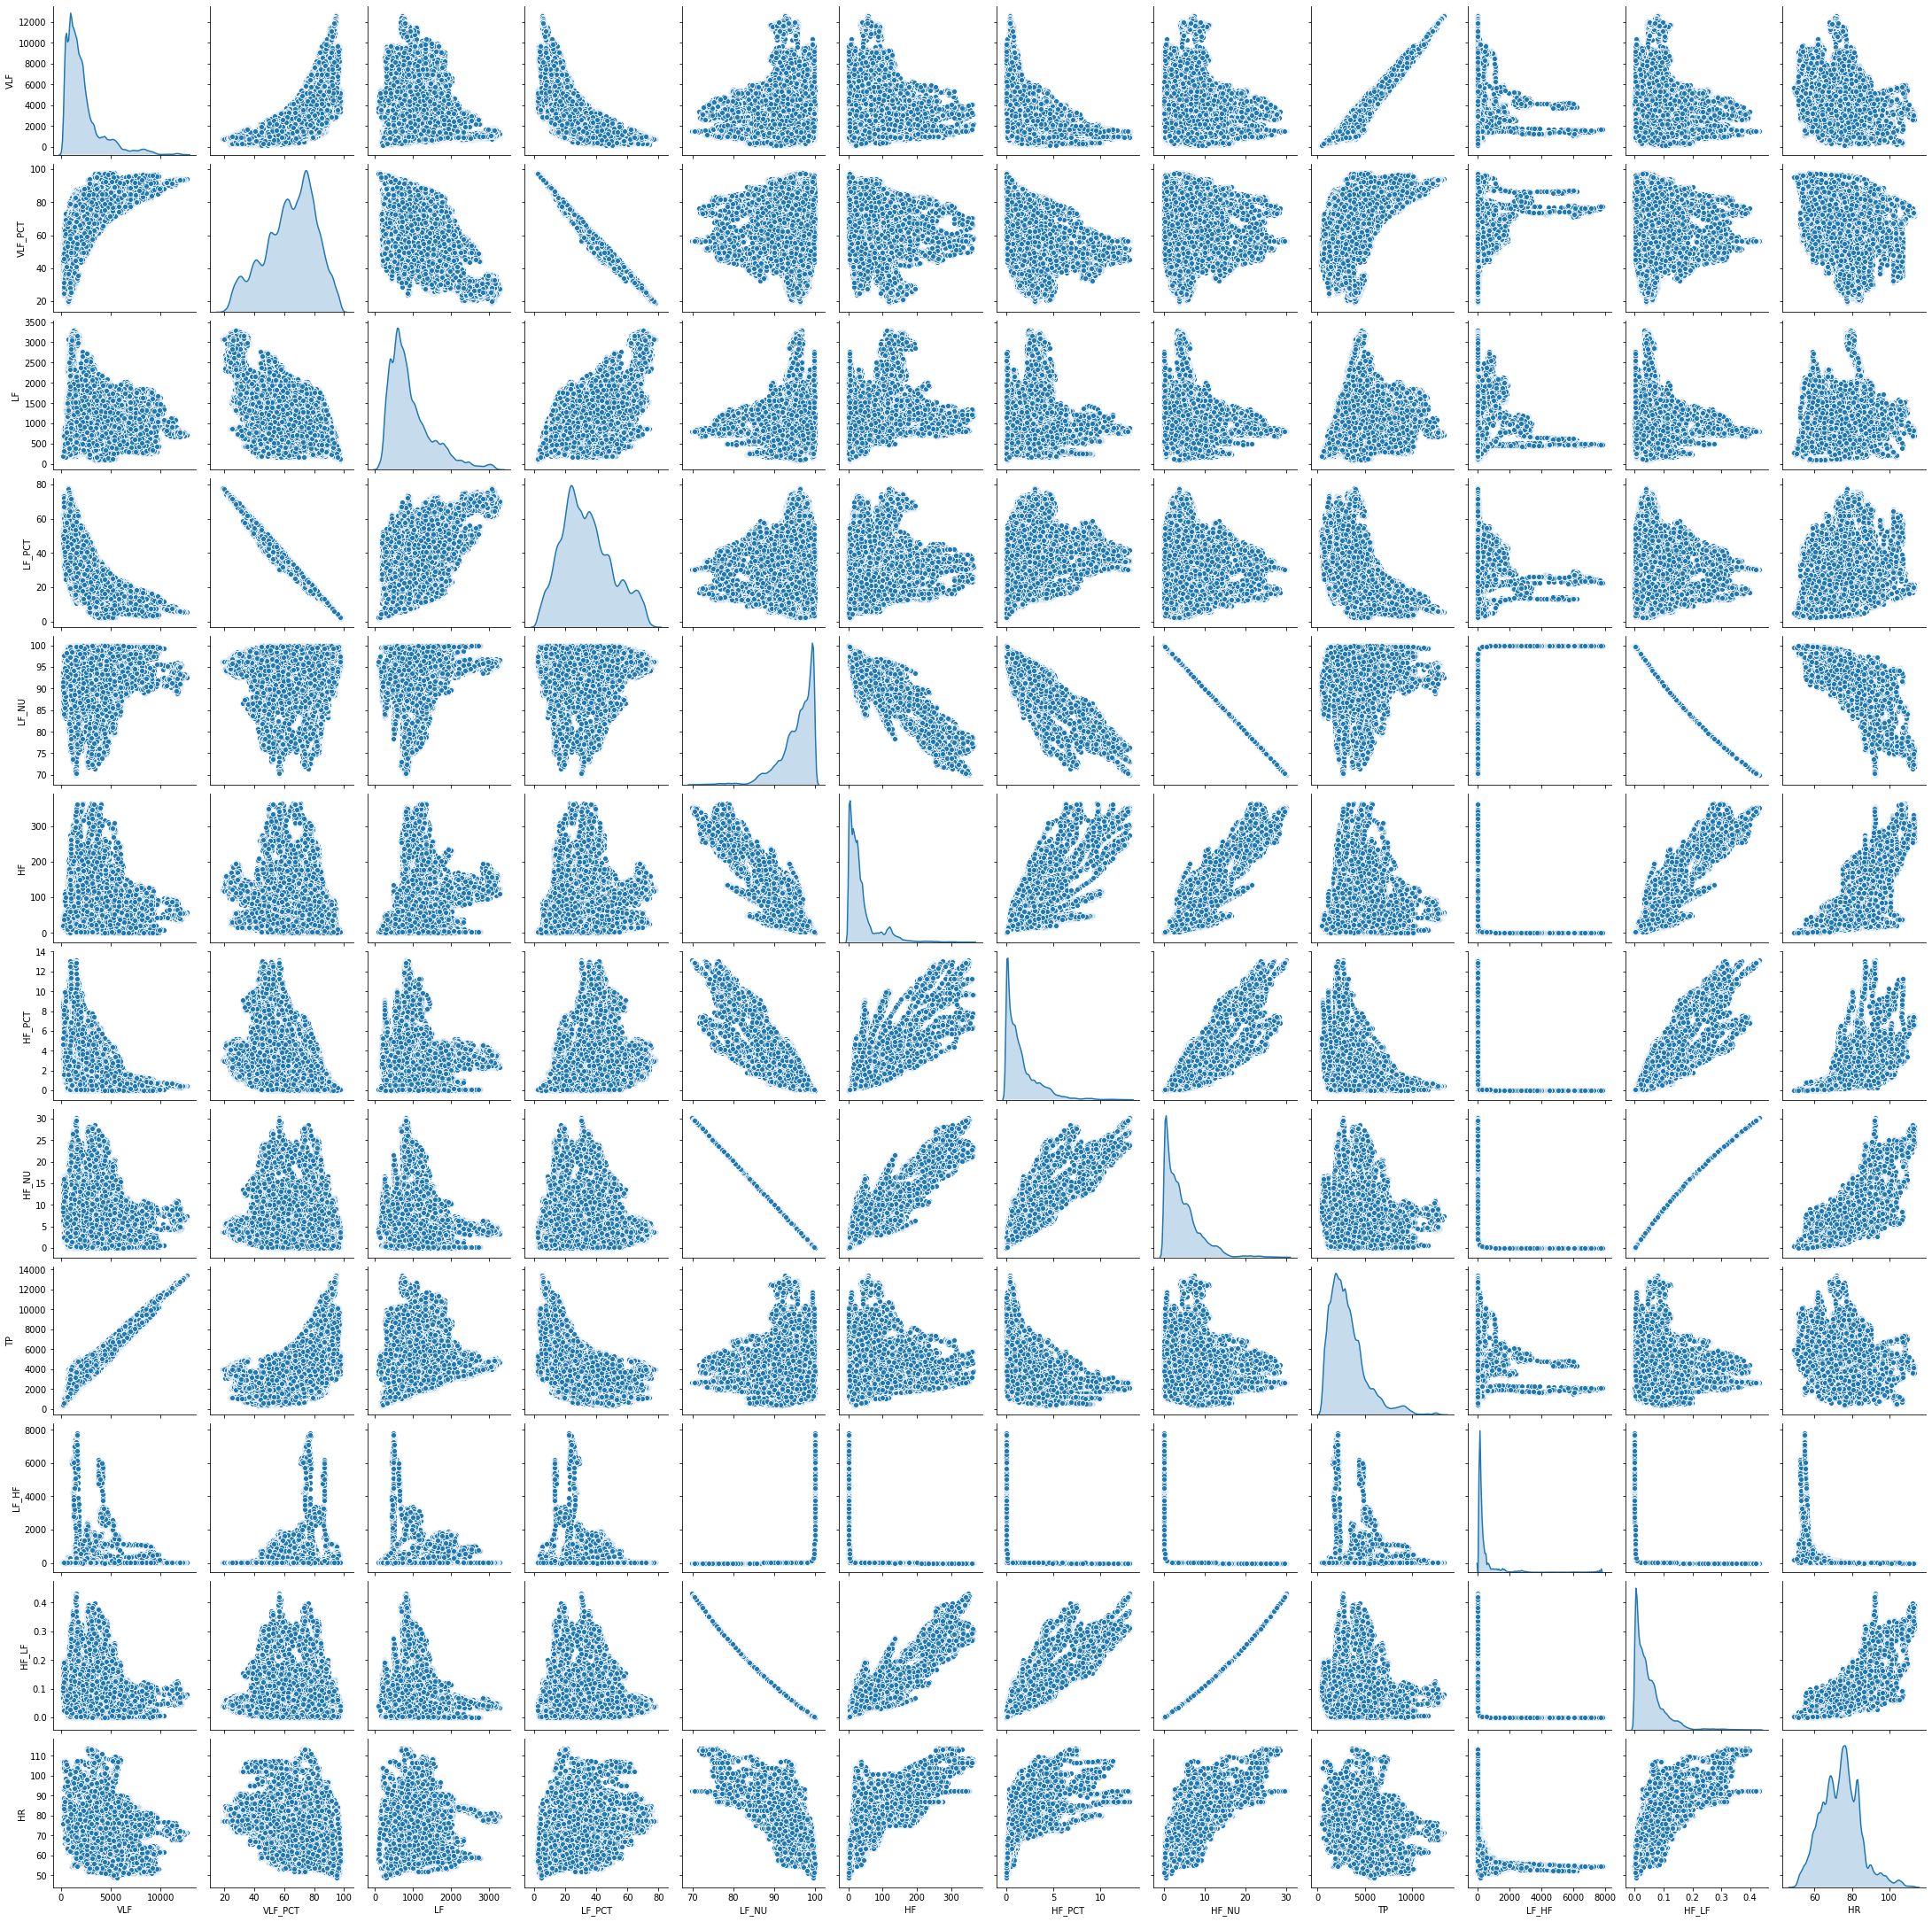

In [32]:
sns.pairplot(data=f_df,diag_kind='kde')

    - LF_FCT vs VLF_FCT 
    - LF_NU vs HF_NU
    - TP vs VLF
    - HF_LF vs LF_NU
 

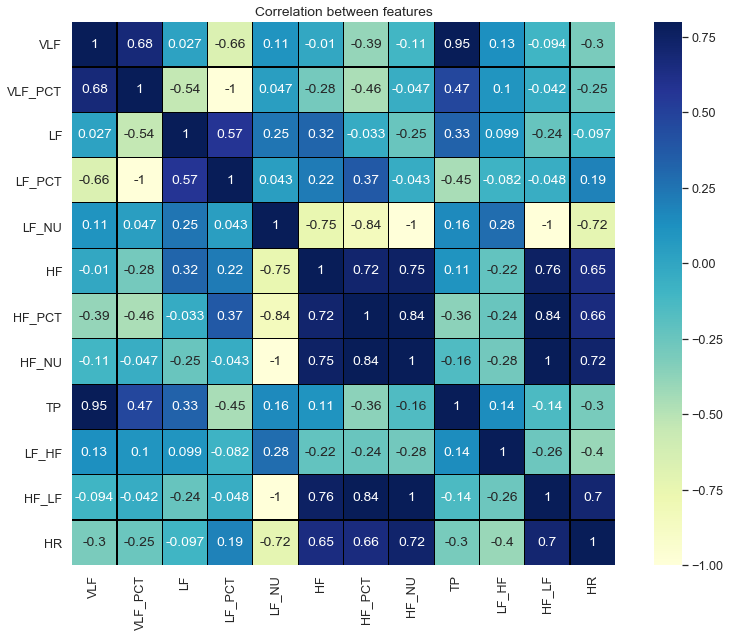

In [33]:
#heatmap
cor=f_df.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="YlGnBu",linecolor="black")
plt.title('Correlation between features');

## Outliers

In [39]:
for column in fdf_new: 
        Q1=f_df[column].quantile(q=0.25)
        Q3=f_df[column].quantile(q=0.75)
        print(column+': 1st Quartile (Q1) is: ', Q1)
        print(column+': 3st Quartile (Q3) is: ', Q3)
        print(column+': Interquartile range (IQR) is ', stats.iqr(f_df[column]))
        # IQR=Q3-Q1
        #lower 1.5*IQR whisker i.e Q1-1.5*IQR
        #upper 1.5*IQR whisker i.e Q3+1.5*IQR
        L_outliers=Q1-3*(Q3-Q1)
        U_outliers=Q3+3*(Q3-Q1)
        print(column+': Lower outliers in age: ', L_outliers)
        print(column+': Upper outliers in age: ', U_outliers)
        print(column+': Number of outliers in age upper : ', f_df[f_df[column]>U_outliers][column].count())
        print(column+': Number of outliers in age lower : ', f_df[f_df[column]<L_outliers][column].count())
        print(column+': % of Outlier in age upper: ',round(f_df[f_df[column]>U_outliers][column].count()*100/len(f_df)), '%')
        print(column+': % of Outlier in age lower: ',round(f_df[f_df[column]<L_outliers][column].count()*100/len(f_df)), '%')
        print('*************************************************************************************************');

VLF: 1st Quartile (Q1) is:  1001.189280127621
VLF: 3st Quartile (Q3) is:  2654.121052410762
VLF: Interquartile range (IQR) is  1652.9317722831408
VLF: Lower outliers in age:  -3957.6060367218015
VLF: Upper outliers in age:  7612.916369260184
VLF: Number of outliers in age upper :  9938
VLF: Number of outliers in age lower :  0
VLF: % of Outlier in age upper:  3.0 %
VLF: % of Outlier in age lower:  0.0 %
*************************************************************************************************
VLF_PCT: 1st Quartile (Q1) is:  52.9098766886486
VLF_PCT: 3st Quartile (Q3) is:  76.82503184739295
VLF_PCT: Interquartile range (IQR) is  23.915155158744348
VLF_PCT: Lower outliers in age:  -18.83558878758445
VLF_PCT: Upper outliers in age:  148.570497323626
VLF_PCT: Number of outliers in age upper :  0
VLF_PCT: Number of outliers in age lower :  0
VLF_PCT: % of Outlier in age upper:  0.0 %
VLF_PCT: % of Outlier in age lower:  0.0 %
**********************************************************

So, let's replace these outliers with median values.

In [40]:
df_clean = f_df.copy()

In [42]:
df_clean.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,HR
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,69.499952
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,64.363150
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,67.450066
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,68.809562
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,74.565728


In [44]:
#Replacing the outliers by median
for col_name in fdf_new:
    q1 = df_clean[col_name].quantile(0.25)
    q3 = df_clean[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-3*iqr
    high = q3+3*iqr
    df_clean.loc[(df_clean[col_name] < low) | (df_clean[col_name] > high), col_name] = df_clean[col_name].median()

In [45]:
for column in fdf_new: 
        Q1=df_clean[column].quantile(q=0.25)
        Q3=df_clean[column].quantile(q=0.75)
        L_outliers=Q1-3*(Q3-Q1)
        U_outliers=Q3+3*(Q3-Q1)
        print(column+': Number of outliers in age upper : ', df_clean[df_clean[column]>U_outliers][column].count())
        print(column+': Number of outliers in age lower : ', df_clean[df_clean[column]<L_outliers][column].count())
        print(column+': % of Outlier in age upper: ',round(df_clean[df_clean[column]>U_outliers][column].count()*100/len(df_clean)), '%')
        print(column+': % of Outlier in age lower: ',round(df_clean[df_clean[column]<L_outliers][column].count()*100/len(df_clean)), '%')
        print('*************************************************************************************************');

VLF: Number of outliers in age upper :  2769
VLF: Number of outliers in age lower :  0
VLF: % of Outlier in age upper:  1.0 %
VLF: % of Outlier in age lower:  0.0 %
*************************************************************************************************
VLF_PCT: Number of outliers in age upper :  0
VLF_PCT: Number of outliers in age lower :  0
VLF_PCT: % of Outlier in age upper:  0.0 %
VLF_PCT: % of Outlier in age lower:  0.0 %
*************************************************************************************************
LF: Number of outliers in age upper :  58
LF: Number of outliers in age lower :  0
LF: % of Outlier in age upper:  0.0 %
LF: % of Outlier in age lower:  0.0 %
*************************************************************************************************
LF_PCT: Number of outliers in age upper :  0
LF_PCT: Number of outliers in age lower :  0
LF_PCT: % of Outlier in age upper:  0.0 %
LF_PCT: % of Outlier in age lower:  0.0 %
******************************

In **df_clean**, we have dealt with issue of outliers.